# Load packages and define useful functions

In [1]:
# Loading the required packages to run this notebook
import src.utils.utils as utils
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import seaborn as sns
from pathlib import Path

# Use seaborn style defaults and set the default figure size
fig_size = (12, 8)
sns.set(rc={"figure.figsize": fig_size})
sns.set_theme(style="whitegrid")
sns.set_context("paper", rc={"lines.linewidth": 3.0})
style.use("seaborn-colorblind")
sns.set_style("ticks")

# Setup the correct foldure structure
project_dir = Path().resolve().parents[1]
model_dir = project_dir / "models" / "saved-models"
model_intermediate_dir = model_dir / "intermediate"

# Look at the default setup
Use the VRNN model, 100 dimensional latent and recurrent laten space, and no batch normalization, scheduler, or KL annealing. Showing results for fishing, cargo and tanker vessels

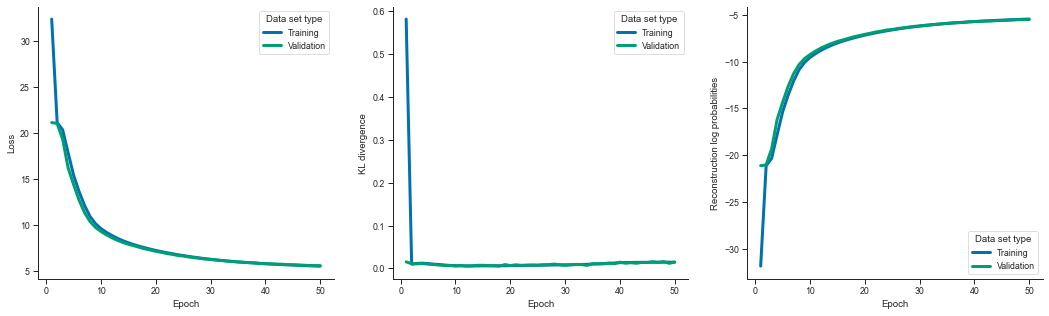

In [2]:
data_processed = "RegionBornholm_01062019_30092019_FishCargTank_14400_86400_600"
df_default = utils.curves_df("Default", data_processed, model_dir)
utils.plot_curves(df_default)

#  Annealed Kullback–Leibler 

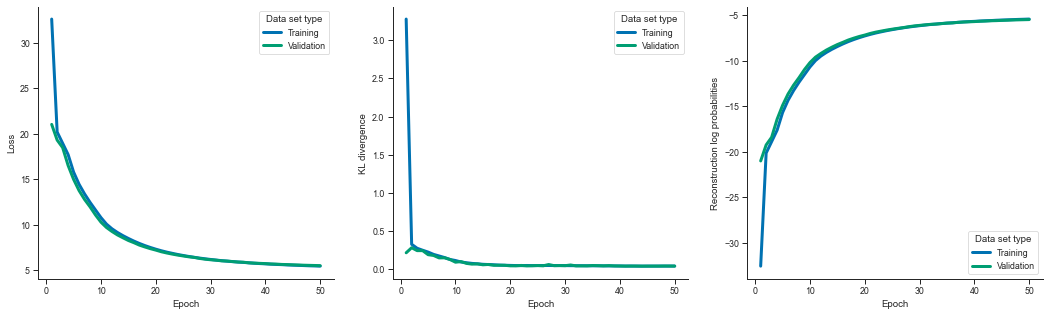

In [3]:
df_annealing = utils.curves_df("Annealing", data_processed, model_dir, kl_annealing=True)
utils.plot_curves(df_annealing)

# Use batch normalization
Use the VRNN model, 100 dimensional latent and recurrent laten space, batch normalization, but no scheduler or KL annealing. Showing results for fishing, cargo and tanker vessels

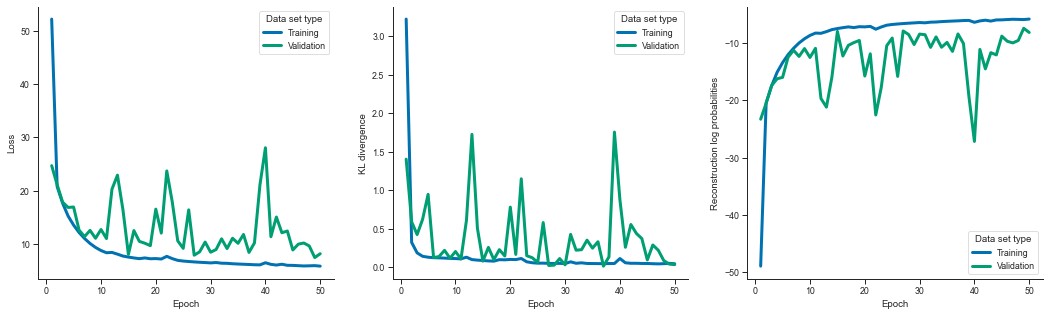

In [4]:
df_batch_norm = utils.curves_df("Batch_Norm", data_processed, model_dir, batch_norm=True)
utils.plot_curves(df_batch_norm)

#  Batch normalization & Annealed Kullback–Leibler 

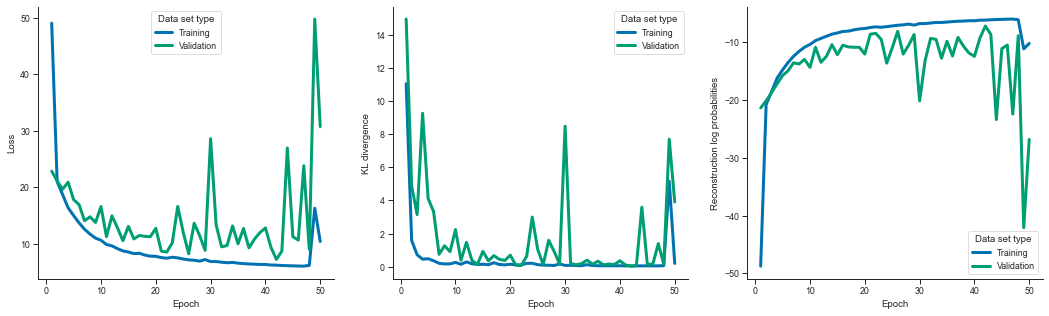

In [5]:
df_batch_norm_annealing = utils.curves_df("Batch_Norm_Annealing", data_processed, model_dir, batch_norm=True, kl_annealing=True)
utils.plot_curves(df_batch_norm_annealing)

# Compare the different model setups

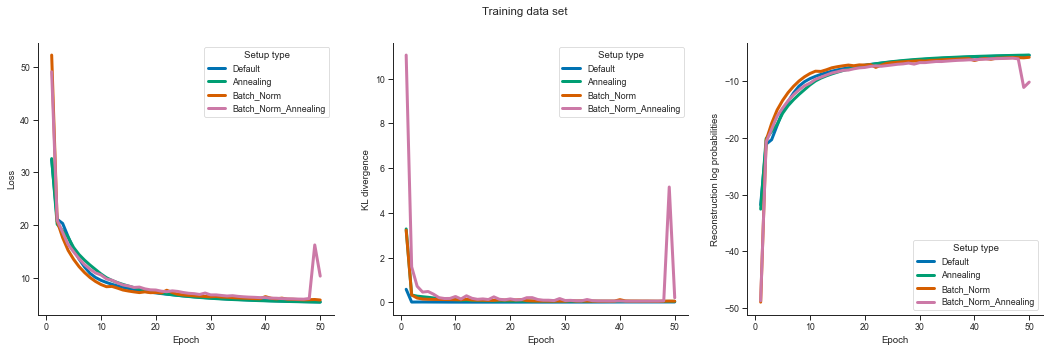

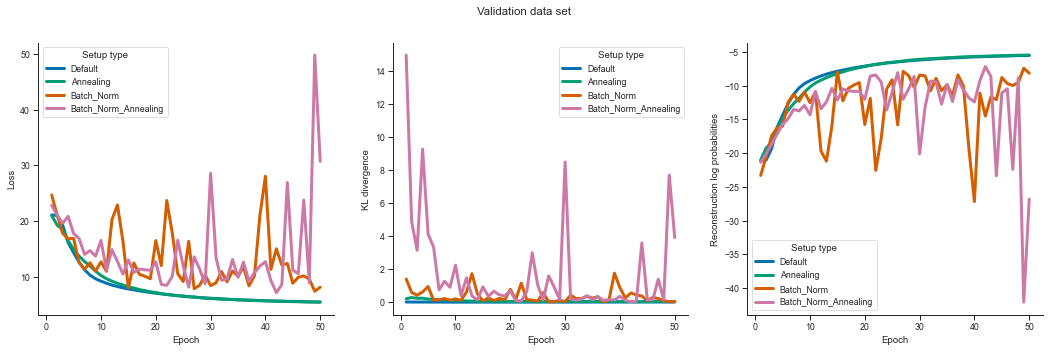

In [6]:
df = pd.concat([df_default, df_annealing, df_batch_norm, df_batch_norm_annealing])
df.reset_index(drop=True, inplace=True)
hue = "Setup type"
hue_order = ["Default", "Annealing", "Batch_Norm", "Batch_Norm_Annealing"]
utils.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set")
utils.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set")